In [2]:
# import packages.
import numpy as np  
import sys,os  
import cv2
import time
import caffe  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import time

In [2]:
'''
# define caffe net using caffe model and deploy file.
net_file= 'MobileNetSSD_deploy.prototxt'  
caffe_model='MobileNetSSD_deploy.caffemodel'  
net = caffe.Net(net_file,caffe_model,caffe.TEST)  
'''

In [3]:
# detect classes.
CLASSES = ('background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

In [36]:
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [4]:
# image preprocess:mean subtraction and scale.
def preprocess(src):
    img = cv2.resize(src, (300,300))
    img = img - 127.5
    img = img * 0.007843
    return img

In [5]:
# postprocess : after forward compute.
def postprocess(img, out):   
    h = img.shape[0]
    w = img.shape[1]
    box = out['detection_out'][0,0,:,3:7] * np.array([w, h, w, h]) # box

    cls = out['detection_out'][0,0,:,1] # class (index).
    conf = out['detection_out'][0,0,:,2] # class confidence.
    return (box.astype(np.int32), conf, cls)

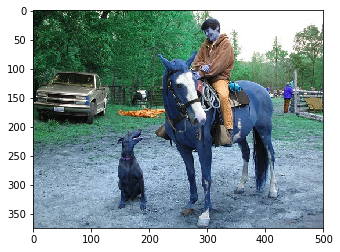

In [16]:
# read in an image for test.
origin_img = cv2.imread('test.jpg')
plt.imshow(origin_img)

In [20]:
# preprocessing.
img = preprocess(origin_img)

In [21]:
# cast to np.float32 type.
img = img.astype(np.float32)

In [22]:
# 300*300*3 --> 3*300*300.
img = img.transpose((2, 0, 1))

In [23]:
# define data blob.
net.blobs['data'].data[...] = img

In [58]:
# forward compute.
# time.time() return second.
t1 =time.time()
out = net.forward() 
t2 = time.time()
print "time:%s"%(t2 - t1)
print out
print '************************************************************'
print out['detection_out'].shape
print '************************************************************'
print out['detection_out'][:,:,:,1]
print '************************************************************'
print out['detection_out'][:,:,:,2]
print '************************************************************'
print out['detection_out'][:,:,:,3:7]

time:0.222590208054
{'detection_out': array([[[[  0.00000000e+00,   3.00000000e+00,   6.09593570e-01,
            2.85804778e-01,   5.36927342e-01,   3.97047609e-01,
            9.18488622e-01],
         [  0.00000000e+00,   7.00000000e+00,   9.61286843e-01,
            7.99584389e-03,   2.80535251e-01,   2.61952400e-01,
            5.20797849e-01],
         [  0.00000000e+00,   1.20000000e+01,   3.77612889e-01,
            2.88798779e-01,   5.37948608e-01,   3.96932393e-01,
            9.08719301e-01],
         [  0.00000000e+00,   1.30000000e+01,   9.92195010e-01,
            3.96910191e-01,   1.81327909e-01,   8.52346778e-01,
            9.59752798e-01],
         [  0.00000000e+00,   1.50000000e+01,   8.94771039e-01,
            5.22089183e-01,   2.76223719e-02,   6.86753690e-01,
            5.83878994e-01]]]], dtype=float32)}
************************************************************
(1, 1, 5, 7)
************************************************************
[[[  3.   7.  12.  13. 

In [25]:
# post processing.
box, conf, cls = postprocess(origin_img, out)
print box
print len(box)

[[142 201 198 344]
 [  3 105 130 195]
 [144 201 198 340]
 [198  67 426 359]
 [261  10 343 218]]
5


draw the bounding boxs:
p1 is the left-upper corner, p2 is the right-bottom corner, 
p3 is the Bottom-left corner of the text string in the image.


0.038027048111


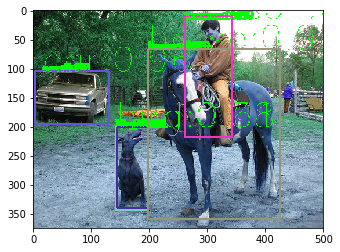

In [54]:
# draw box and text.
time_1 = time.time()
for i in range(len(box)):
    p1 = (box[i][0], box[i][1])
    p2 = (box[i][2], box[i][3])
    cv2.rectangle(origin_img, p1, p2, COLORS[i],2)
    p3 = (max(p1[0], 15), max(p1[1], 15))
    title = "%s:%.2f" % (CLASSES[int(cls[i])], conf[i])
    cv2.putText(origin_img, title, p3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
plt.imshow(origin_img)
time_2 = time.time()
print time_2 - time_1